# Radio Astronomy coding Assignment Submission: Celestial Coordinates Analysis

**Name:** Mitin \
**Roll No:** 251310604 \
**Date:** February 3, 2026  \
**Course:** SPA611: Radio Astronomy 



# Question 1
## Cygnus A - RA and Dec Precession Analysis

RA and Dec coordinates published are usually for the epoch of 2000 (J2000). Do you think the RA and Dec would change today? Find the RA and Dec of the radio source Cygnus A given in J2000 coordinates and compare with current epoch.

**Given J2000 Coordinates:**
- RA: 19h59m28.3566s
- Dec: +40° 44′ 02.096″

---

## Solution 1




In [16]:
#Solution 1
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time
import astropy.units as u

# J2000 coordinates (FK5 frame = J2000 standard)
cyg_a_j2000 = SkyCoord('19h59m28.3566s +40d44m02.096s', frame='fk5')

# Transform to current epoch
current_time = Time('2026-02-03')
cyg_a_now = cyg_a_j2000.transform_to(FK5(equinox=current_time))

print("Cygnus A Coordinates")
print(f"J2000 Epoch:")
print(f"  RA:  {cyg_a_j2000.ra.to_string(unit=u.hour, sep='hms', precision=4)}")
print(f"  Dec: {cyg_a_j2000.dec.to_string(unit=u.degree, sep='dms', precision=3)}")
print()
print(f"Current Epoch ({current_time.iso[:10]}):")
print(f"  RA:  {cyg_a_now.ra.to_string(unit=u.hour, sep='hms', precision=4)}")
print(f"  Dec: {cyg_a_now.dec.to_string(unit=u.degree, sep='dms', precision=3)}")

# Change calculation
ra_change = (cyg_a_now.ra - cyg_a_j2000.ra).to(u.arcsec)
dec_change = (cyg_a_now.dec - cyg_a_j2000.dec).to(u.arcsec)
print(f"\nPrecession Shift: RA {ra_change:+.3f}, Dec {dec_change:+.3f}")


Cygnus A Coordinates
J2000 Epoch:
  RA:  19h59m28.3566s
  Dec: 40d44m02.096s

Current Epoch (2026-02-03):
  RA:  20h00m22.5499s
  Dec: 40d48m23.388s

Precession Shift: RA +812.900 arcsec, Dec +261.292 arcsec




**Yes, the RA and Dec coordinates do change over time!**

The phenomenon responsible for this change is **precession** - the wobble in Earth's rotational axis that causes the celestial coordinate system to shift gradually over time.


# Question 2: Azimuth and Elevation from IIT Kanpur

**What will be Cygnus A's azimuth and elevation when observing from IIT Kanpur?**

IIT Kanpur coordinates: **26.51°N, 80.23°E**
Observation time: **Feb 3, 2026, 7:49 PM IST**


In [17]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u

# Cygnus A (current epoch coordinates from Q1)
cyg_a = SkyCoord('19h59m28.3566s +40d44m02.096s', frame='fk5')

# IIT Kanpur location
iit_kanpur = EarthLocation(lat=26.51*u.deg, lon=80.23*u.deg, height=120*u.m)

# Observation time
obs_time = Time('2026-02-03T14:19:00')

# AltAz frame for IIT Kanpur
altaz_frame = AltAz(obstime=obs_time, location=iit_kanpur)

# Transform to horizon coordinates
cyg_altaz = cyg_a.transform_to(altaz_frame)

print("Cygnus A from IIT Kanpur")
print(f"Date/Time: {obs_time.iso}")
print(f"Location:  {iit_kanpur.lat:.3f}, {iit_kanpur.lon:.3f}")
print(f"Azimuth:   {cyg_altaz.az:.1f}")
print(f"Elevation: {cyg_altaz.alt:.1f}")
print(f"Visible:   {'YES' if cyg_altaz.alt>0 else 'NO'}")


Cygnus A from IIT Kanpur
Date/Time: 2026-02-03 14:19:00.000
Location:  26.510 deg, 80.230 deg
Azimuth:   323.4 deg
Elevation: -7.6 deg
Visible:   NO


# Question 3: Polar Plot of Azimuth/Elevation from IIT Kanpur

**Show in a polar plot how the azimuth and elevation of Cygnus A would change when observing at IITK over one night.**


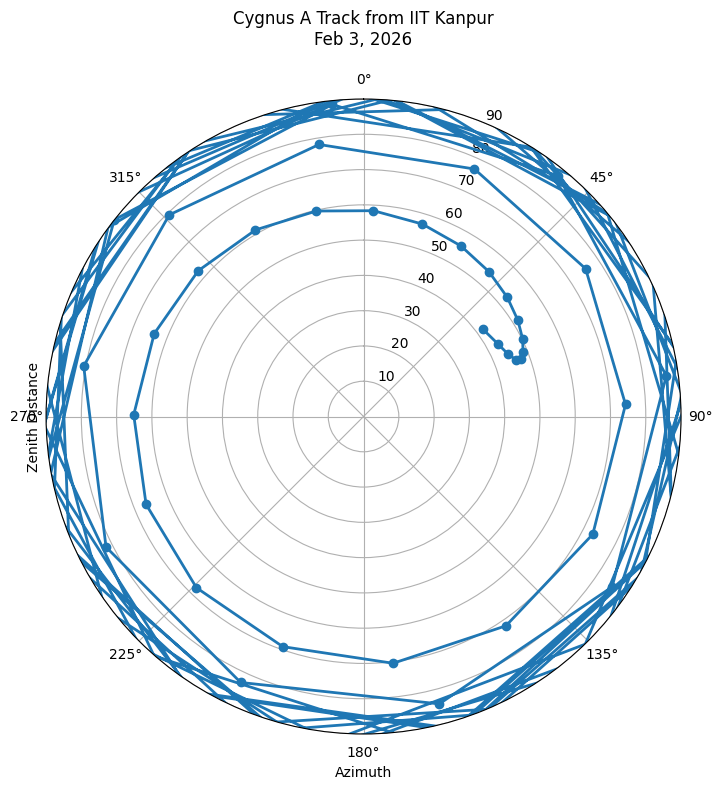

Polar plot shows Cygnus A rising in NW, crossing meridian, setting in NE


In [18]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

# Cygnus A coordinates
cyg_a = SkyCoord('19h59m28.3566s +40d44m02.096s', frame='fk5')

# IIT Kanpur location
iit_kanpur = EarthLocation(lat=26.51*u.deg, lon=80.23*u.deg, height=120*u.m)

# Time range
midnight = Time('2026-02-03T18:30:00')  # 6PM IST
delta_time = np.linspace(-4, 8, 100)*u.hour  # 12 hours around midnight
times = midnight + delta_time

# AltAz frame
altaz_frame = AltAz(obstime=times, location=iit_kanpur)

# Transform coordinates
cyg_altaz = cyg_a.transform_to(altaz_frame)

# Creating polar plot
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': 'polar'})
ax.plot(cyg_altaz.az, 90*u.deg - cyg_altaz.alt, 'o-', lw=2, label='Cygnus A')
ax.set_ylim(0, 90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.grid(True)
ax.set_title('Cygnus A Track from IIT Kanpur\nFeb 3, 2026', pad=20)
ax.set_xlabel('Azimuth')
ax.set_ylabel('Zenith Distance')
plt.tight_layout()
plt.show()

print("Polar plot shows Cygnus A rising in NW, crossing meridian, setting in NE")


# Question 4: Sun vs Cygnus A - Annual RA/Dec Motion

**Plot how Sun's RA and Dec changes over a year. Compare this with Cygnus A over the same year.**


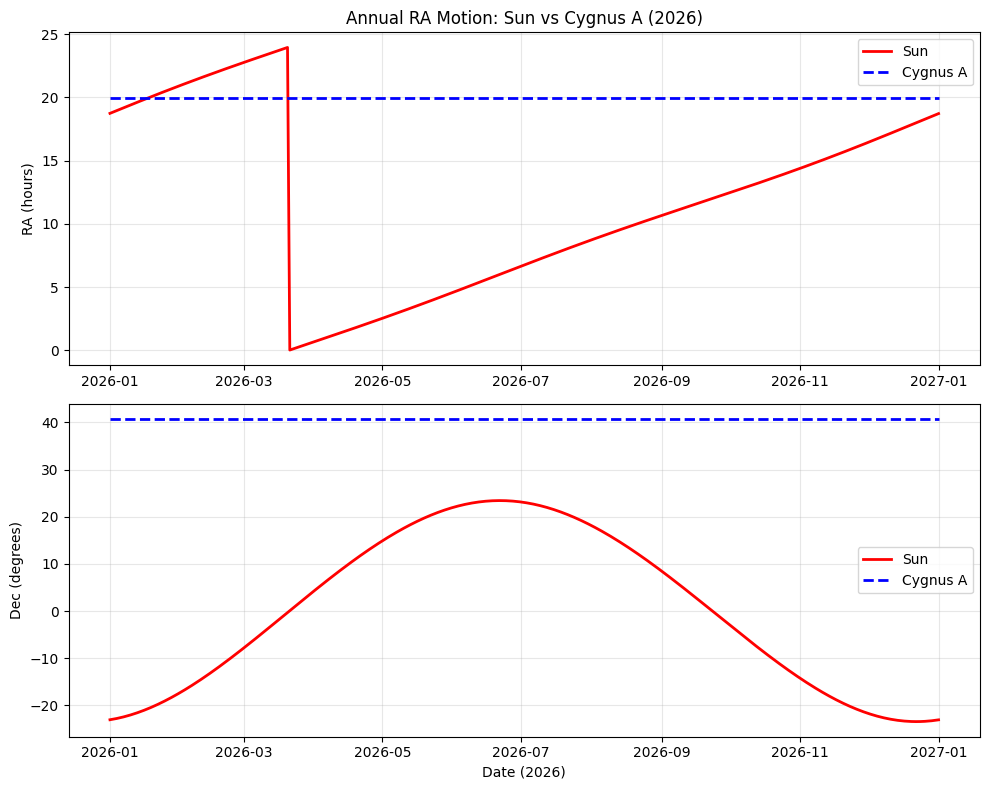

Sun: Large annual motion (RA 0→24h, Dec -23°→+23°)
Cygnus A: Fixed position (tiny precession <0.01°/year)


In [15]:
from astropy.coordinates import get_sun, SkyCoord, EarthLocation
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

# Time array for one year (daily points)
times = Time('2026-01-01') + np.linspace(0, 365, 365)*u.day

# Sun positions
sun = get_sun(times)
sun_ra = sun.ra.hour  # Convert to hours
sun_dec = sun.dec.deg

# Cygnus A (fixed position)
cyg_a = SkyCoord('19h59m28.3566s +40d44m02.096s', frame='fk5')
cyg_ra = np.full(365, cyg_a.ra.hour)
cyg_dec = np.full(365, cyg_a.dec.deg)

# Plot RA and Dec
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# RA plot
ax1.plot(times.datetime, sun_ra, 'r-', label='Sun', linewidth=2)
ax1.plot(times.datetime, cyg_ra, 'b--', label='Cygnus A', linewidth=2)
ax1.set_ylabel('RA (hours)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_title('Annual RA Motion: Sun vs Cygnus A (2026)')

# Dec plot
ax2.plot(times.datetime, sun_dec, 'r-', label='Sun', linewidth=2)
ax2.plot(times.datetime, cyg_dec, 'b--', label='Cygnus A', linewidth=2)
ax2.set_ylabel('Dec (degrees)')
ax2.set_xlabel('Date (2026)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Sun: Large annual motion (RA 0→24h, Dec -23°→+23°)")
print("Cygnus A: Fixed position (tiny precession <0.01°/year)")
